# Load sequence generator ( lsg )

Load sequence generator can generate the pseudo load sequence for fatigue and fracture test.

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

## Random walk

Random walk is a random process describing a succession of random steps in the mathematical space.

### Uniform random walk

Function `randomWalkUniform` implements the uniform random walk function.

The uniform random walk starts from the mathematical origin. The function then update the coordinates by randomly picking a dimension and a direction.

#### Function help

In [2]:
from ffpack.lsg import randomWalkUniform
help( randomWalkUniform )

Help on function randomWalkUniform in module ffpack.lsg.randomWalk:

randomWalkUniform(numSteps, dim=1)
    Generate load sequence by random walk.
    
    Parameters
    ----------
    numSteps: integer 
        Number of numSteps for generating.
    dim: scalar, optional
        Data dimension.
    
    Returns
    -------
    rst: 2d array
        A 2d (numSteps by dim) matrix holding the coordinates 
        of the position at each step.
    
    Raises
    ------
    ValueError
        If the numSteps is less than 1 or the dim is less than 1.
    
    Examples
    --------
    >>> from ffpack.lsg import randomWalkUniform
    >>> rst = randomWalkUniform( 5 )



#### Example in 2D space

In [3]:
urwResults = randomWalkUniform( 500, 2 )

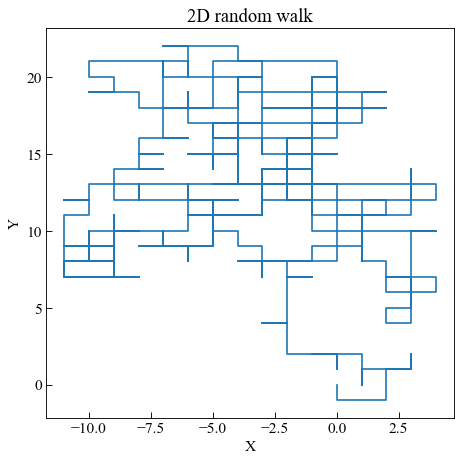

In [4]:
fig, ax = plt.subplots( figsize=( 6, 6 ) )

ax.plot( np.array( urwResults )[ :, 0 ], 
         np.array( urwResults )[ :, 1 ] )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_xlabel( "X" )
ax.set_ylabel( "Y" )
ax.set_title( "2D random walk" )

plt.tight_layout()
plt.show()

## Autoregressive model

Autoregressive model is a random process describing the time-varying procedure in which the output depends on the previous values.

### Normal autoregressive model

Function `arNormal` implements the autoregressive model for arbitrary order. The order depends on the length of the initial observed values.

#### Function help

In [5]:
from ffpack.lsg import arNormal
help( arNormal )

Help on function arNormal in module ffpack.lsg.autoregressiveMode:

arNormal(numSteps, obs, phis, mu, sigma)
    Generate load sequence by autoregressive model.
    
    The white noise is generated by the normal distribution.
    
    Parameters
    ----------
    numSteps: integer 
        Number of steps for generating.
    obs: 1d array
        Initial observed values.
    phis: 1d array
        Coefficients for autoregressive model.
    mu: scalar
        Mean of the white noise.
    sigma: scalar
        Standard deviation of the white noise.
    
    Returns
    -------
    rst: 1d array
        Generated sequence includes the observed values.
    
    Raises
    ------
    ValueError
        If the numSteps is less than 1.
        If lengths of obs and phis are not equal.
    
    Examples
    --------
    >>> from ffpack.lsg import arNormal
    >>> obs = [ 0, 0  ]
    >>> phis = [ 0.5, 0.3 ]
    >>> rst = arNormal( 500, obs, phis, 0, 0.5 )



#### Example with default values

In [6]:
obs = [ 0, 0  ]
phis = [ 0.5, 0.3 ]
arnResults = arNormal( 500, obs, phis, 0, 0.5 )

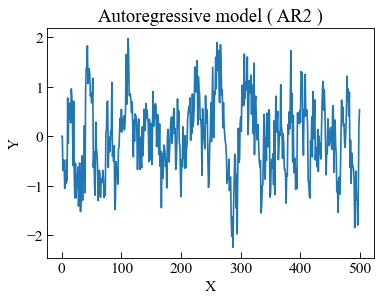

In [7]:
fig, ax = plt.subplots()

ax.plot( np.array( arnResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_xlabel( "X" )
ax.set_ylabel( "Y" )
ax.set_title( "Autoregressive model ( AR2 )" )

plt.tight_layout()
plt.show()